In [1]:
import pickle
import numpy as np
import lzma
import scipy.signal
import tensortools as tt
import pickle
import matplotlib.pyplot as plt

In [2]:
def add_gaussian_kernel(input_vector, kernel_size, sigma):

    # Define the Gaussian kernel
    kernel = scipy.signal.gaussian(kernel_size, sigma)
    
    # Initialize the result vector with zeros as floating-point numbers
    result_vector = np.zeros(len(input_vector), dtype=float)
    
    # Iterate through the input vector
    for i, value in enumerate(input_vector):
        if value == 1.0:
            # Add the Gaussian kernel to the result vector centered around the current index
            start_idx = max(0, i - (kernel_size // 2))
            end_idx = min(len(input_vector), i + (kernel_size // 2) + 1)
            result_vector[start_idx:end_idx] += kernel[
                (kernel_size // 2) - (i - start_idx) : (kernel_size // 2) + (end_idx - i)
            ]
    
    return result_vector

# Example usage:
# input_vector = [0, 1, 0, 0, 1, 0, 0, 0, 1, 0,0,0,0]
sigma_my = 1.0 / 0.025
kernel_size_my = int(sigma_my) * 5 * 2 + 1
# result = add_gaussian_kernel(input_vector, kernel_size, sigma)
# print(result)

def FiletoVec(name):
    with lzma.open("./savedoutput/" + name + ".xz", "rb") as fp:
        outsaved = pickle.load(fp)
    vec_space = 0.025
    spike_mat = np.zeros((len(outsaved), int(10000/vec_space)))
    for i in range(len(outsaved)):
        for n in range(len(outsaved[i])):
            j = int(outsaved[i][n]/vec_space)
            spike_mat[i, j] = 1
    return spike_mat

def FiletoVec_param(NetworkType, n, model_id, input_idx, MeanDelay, stdDelay, n_run):
    CellType = "point"
    name = str(NetworkType) + '_' + str(CellType) + '_layercount' + str(n) + '_model' + str(model_id) + '_input' + str(input_idx) + '_stddelay' + str(stdDelay) + '_meandelay' + str(MeanDelay) + '_nrun' + str(n_run)
    return FiletoVec(name)

def VecbyParm(NetworkType, n, model_id, input_idx, MeanDelay, stdDelay):
    vec_lst = []
    for n_run in np.arange(0, 10, 1):
        vec_lst.append(FiletoVec_param(NetworkType, n, model_id, input_idx, MeanDelay, stdDelay, n_run))
    return np.stack(vec_lst)



def VecbyParm_withGaussian(NetworkType, n, model_id, input_idx, MeanDelay, stdDelay):
    noguas = VecbyParm(NetworkType, n, model_id, input_idx, MeanDelay, stdDelay)

    result_3d = np.apply_along_axis(add_gaussian_kernel, axis=2, arr=noguas, kernel_size = kernel_size_my, sigma = sigma_my)

    return result_3d
    

In [3]:

# vec_lst_nogau = VecbyParm('FeedForward', 30, 0, 0, 2.8, 0.1)
# vec_lst = VecbyParm_withGaussian('FeedForward', 60, 0, 0, 2.8, 0.1)

In [4]:
# vec_lst_nogau = VecbyParm('FeedForward', 30, 0, 0, 2.8, 0.1)

In [5]:
# sum(vec_lst[0][65])
# sum(vec_lst_nogau[0][65])
# vec_lst[0][0]

In [6]:
# vec_lst.shape

In [7]:
vec_lst = VecbyParm_withGaussian('SmallWorld', 30, 0, 0, 2.8, 0.1)
# with open('data_spkden.pkl', 'rb') as file:
#     vec_lst = pickle.load(file)
vec_lst.shape

(10, 30, 400000)

In [9]:
vec_lst[0].shape

(30, 400000)

In [10]:

# vec_lst = VecbyParm_withGaussian('FeedForward', 60, 0, 0, 2.8, 0.1)
# output = np.zeros((vec_lst[0].shape[0], vec_lst[0].shape[1], len(vec_lst)))

# output = np.zeros((vec_lst[0].shape[0], vec_lst[0].shape[1], len(vec_lst)))

# for k in range(len(vec_lst)):
#     output[:, :, k] = vec_lst[k]

# del vec_lst

In [11]:
# Make synthetic dataset.
I, J, K, R = vec_lst.shape[0], vec_lst.shape[1], vec_lst.shape[2], 5 # dimensions and rank
X = vec_lst

# Fit CP tensor decomposition (two times).
U = tt.cp_als(X, rank=R, verbose=True)
V = tt.cp_als(X, rank=R, verbose=True)
# W = tt.cp_als(X, rank=R, verbose=True)


# TCA_list = [U, V, W]
# del output
# with open('result_tca.pkl', 'wb') as file:
#     pickle.dump(TCA_list, file)

CP_ALS: iteration 1, objective 0.9152116487290615, improvement inf.
CP_ALS: iteration 2, objective 0.8575967293206392, improvement 0.05761491940842223.
CP_ALS: iteration 3, objective 0.8539691160596803, improvement 0.0036276132609589506.
CP_ALS: iteration 4, objective 0.8527545809179127, improvement 0.0012145351417676142.
CP_ALS: iteration 5, objective 0.8517146599950679, improvement 0.0010399209228447726.
CP_ALS: iteration 6, objective 0.8507798379377428, improvement 0.0009348220573250909.
CP_ALS: iteration 7, objective 0.8499462368978515, improvement 0.0008336010398912741.
CP_ALS: iteration 8, objective 0.8492098699853181, improvement 0.000736366912533426.
CP_ALS: iteration 9, objective 0.8485658647147764, improvement 0.0006440052705417587.
CP_ALS: iteration 10, objective 0.8480083419163824, improvement 0.000557522798393939.
CP_ALS: iteration 11, objective 0.8475300871005761, improvement 0.0004782548158063227.
CP_ALS: iteration 12, objective 0.847122639300934, improvement 0.000407447

In [14]:
V.obj

0.8445057915377732

In [12]:
dir(U)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'converged',
 'factors',
 'finalize',
 'improvement',
 'iterations',
 'max_iter',
 'max_time',
 'method',
 'min_iter',
 'obj',
 'obj_hist',
 'still_optimizing',
 't0',
 'time_elapsed',
 'tol',
 'total_time',
 'update',
 'verbose']

Rank-1 models:  min obj, 0.93;  max obj, 0.93;  time to fit, 26.9s


Rank-2 models:  min obj, 0.92;  max obj, 0.92;  time to fit, 237.2s


Rank-3 models:  min obj, 0.91;  max obj, 0.91;  time to fit, 338.6s


Rank-4 models:  min obj, 0.90;  max obj, 0.90;  time to fit, 633.1s


Rank-5 models:  min obj, 0.89;  max obj, 0.89;  time to fit, 714.2s


Rank-6 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 984.9s


Rank-7 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 1232.3s


Rank-8 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 1831.3s


Rank-9 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 1960.7s


Rank-10 models:  min obj, 0.85;  max obj, 0.86;  time to fit, 2582.2s


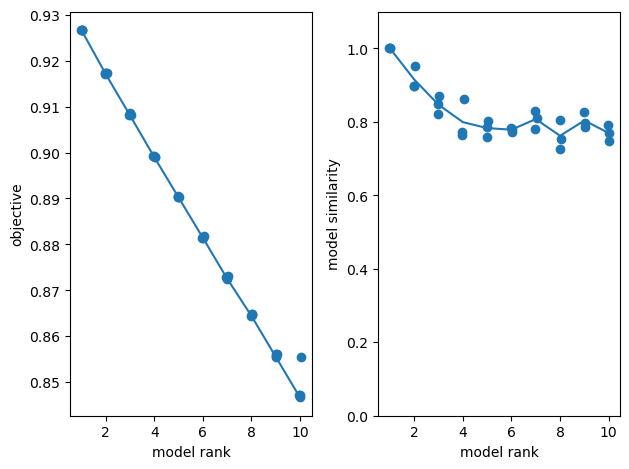

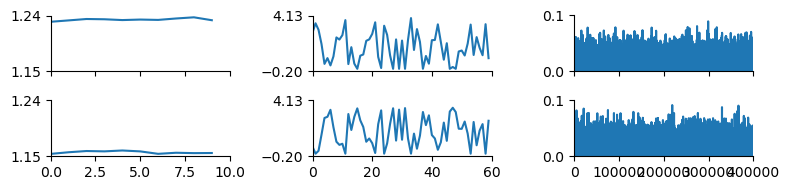

In [13]:
# Fit an ensemble of models, 4 random replicates / optimization runs per model rank
data = vec_lst
ensemble = tt.Ensemble(fit_method="ncp_hals")
ensemble.fit(data, ranks=range(1, 11), replicates=4)

fig, axes = plt.subplots(1, 2)
tt.plot_objective(ensemble, ax=axes[0])   # plot reconstruction error as a function of num components.
tt.plot_similarity(ensemble, ax=axes[1])  # plot model similarity as a function of num components.
fig.tight_layout()

# Plot the low-d factors for an example model, e.g. rank-2, first optimization run / replicate.
num_components = 2
replicate = 0
tt.plot_factors(ensemble.factors(num_components)[replicate])  # plot the low-d factors

plt.show()

In [43]:
ensemble.factors(10)[0].factors[1].shape

(60, 10)

In [47]:
with open('my_object.pkl', 'wb') as f:
    pickle.dump(U, f)

56

In [55]:
U.factors[0]

array([[ 2.90172539, -2.70144478,  2.57377846,  2.67292951, -3.12544251,
        -2.59135069, -2.56310381, -2.68119806,  2.67939245,  2.67344811],
       [ 2.89899065, -2.68923336,  2.58281798,  2.67702308, -3.12926673,
        -2.59176711, -2.56647012, -2.69212232,  2.67581543,  2.67271637],
       [ 2.90352178, -2.70218564,  2.59252823,  2.69181312, -3.13414009,
        -2.57956492, -2.57507506, -2.67591615,  2.67585763,  2.67903839],
       [ 2.90856977, -2.70466774,  2.577194  ,  2.66858403, -3.13546583,
        -2.58372792, -2.57811007, -2.68714463,  2.67391902,  2.67352571],
       [ 2.90079697, -2.69866555,  2.59099955,  2.68004401, -3.13467967,
        -2.59329228, -2.57941814, -2.68363831,  2.67263939,  2.67490773],
       [ 2.91660769, -2.70986167,  2.59155028,  2.6808569 , -3.13636903,
        -2.59685161, -2.56298664, -2.678889  ,  2.66762582,  2.673944  ],
       [ 2.90316445, -2.69498828,  2.59507185,  2.689121  , -3.12233896,
        -2.58536933, -2.57266329, -2.67778297

In [15]:
# with open('result_tca.pkl', 'wb') as file:
#     pickle.dump(TCA_list, file)
# with open('result_tca.pkl', 'rb') as file:
#     TCA_list = pickle.load(file)

with lzma.open('my_object.pkl.xz', 'wb') as f:
    # Use protocol=None to use the highest protocol available
    pickle.dump(U, f, protocol=None)

0.723912642534888


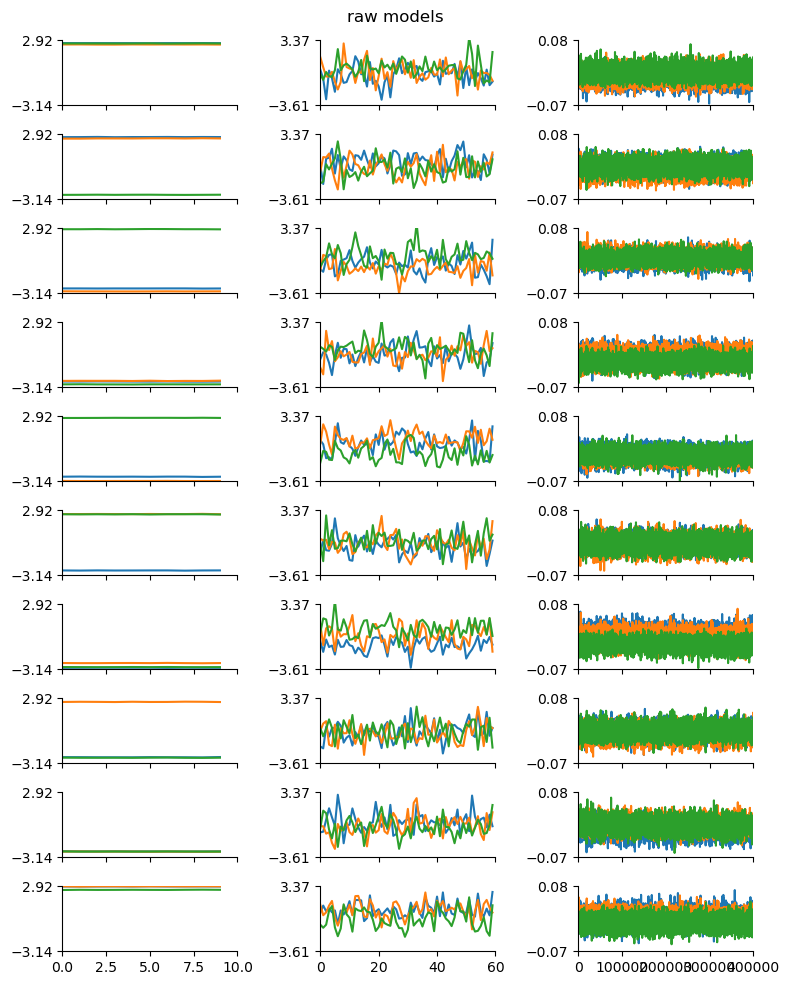

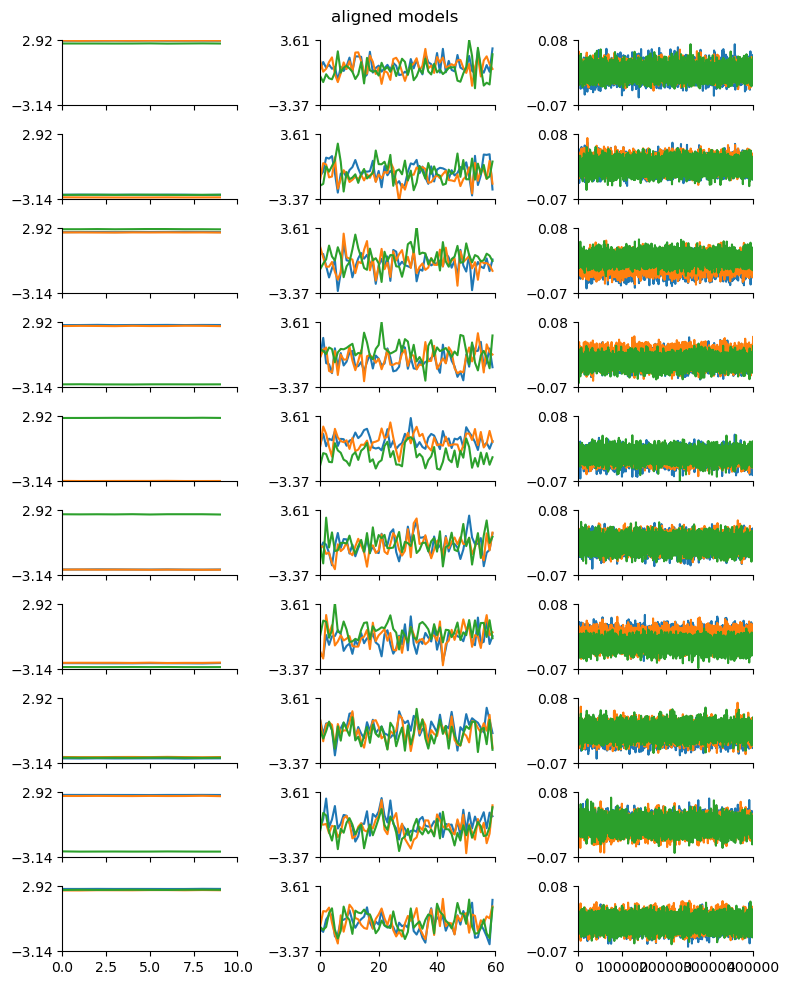

In [12]:



# Compare the low-dimensional factors from the two fits.
fig, ax, po = tt.plot_factors(U.factors)
tt.plot_factors(V.factors, fig=fig)
tt.plot_factors(W.factors, fig=fig)
fig.suptitle("raw models")
fig.tight_layout()

# Align the two fits and print a similarity score.
sim = tt.kruskal_align(U.factors, V.factors, permute_U=True, permute_V=True)
print(sim)


# Plot the results again to see alignment.
fig, ax, po = tt.plot_factors(U.factors)
tt.plot_factors(V.factors, fig=fig)
tt.plot_factors(W.factors, fig=fig)
fig.suptitle("aligned models")
fig.tight_layout()

# Show plots.
plt.show()

In [14]:
# # vec_lst_1 = VecbyParm_withGaussian('FeedForward', 60, 0, 0, 2.8, 0.6)
# # with open('data_spkden_1.pkl', 'rb') as file:
# #     vec_lst_1 = pickle.load(file)
    
# output_1 = np.zeros((100, 100000, len(vec_lst_1)))
# for k in range(len(vec_lst_1)):
#     output_1[:, :, k] = vec_lst_1[k][:100, :100000]
# del vec_lst_1
    
# I, J, K, R = output_1.shape[0], output_1.shape[0], output_1.shape[1], 10 # dimensions and rank
# X = output_1

# # Fit CP tensor decomposition (two times).
# U_1 = tt.cp_als(X, rank=R, verbose=True)
# V_1 = tt.cp_als(X, rank=R, verbose=True)
# W_1 = tt.cp_als(X, rank=R, verbose=True)


# TCA_list_1 = [U_1, V_1, W_1]
# del output_1

In [6]:
# with open('result_tca_1.pkl', 'wb') as file:
#     pickle.dump(TCA_list_1, file)
# with open('result_tca_1.pkl', 'rb') as file:
#     TCA_list_1 = pickle.load(file)

In [15]:



# # Compare the low-dimensional factors from the two fits.
# fig, ax, po = tt.plot_factors(U_1.factors)
# tt.plot_factors(V_1.factors, fig=fig)
# tt.plot_factors(W_1.factors, fig=fig)
# fig.suptitle("raw models")
# fig.tight_layout()

# # Align the two fits and print a similarity score.
# sim = tt.kruskal_align(U_1.factors, V_1.factors, permute_U=True, permute_V=True)
# print(sim)

# # Plot the results again to see alignment.
# fig, ax, po = tt.plot_factors(U_1.factors)
# tt.plot_factors(V_1.factors, fig=fig)
# tt.plot_factors(W_1.factors, fig=fig)
# fig.suptitle("aligned models")
# fig.tight_layout()

# # Show plots.
# plt.show()

In [ ]:
# TCA_list = [U, V, W]

In [ ]:
# with open("person.pkl", "wb") as file:
#     pickle.dump(TCA_list, file)

In [ ]:
# with open("person.pkl", "rb") as file:
#     loaded_person = pickle.load(file)

In [ ]:
# loaded_person[0].factors[0]

In [21]:
V.factors[2].shape

(400000, 10)

In [ ]:
dir(V)